<a href="https://colab.research.google.com/github/KhmAsif/IMSE441/blob/main/Lab_6_Confidence_interval_MM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **One sample z-test and t-test**

>Hypothesis testing is a statistical method to determine if there is enough evidence to support/reject a hypothesis about a population parameter
There are 2 types of hypotheses we will use.

- **Null Hypothesis H<sub>0</sub>** and **Alternate Hypothesis H<sub>a</sub>**

These statements are dependent on the nature of research question (like what do we want?). 
>Choose a significance level α (common values are 0.05, 0.01), z-test gives an output **[z-Statistic, p-value]** and t-test outputs **[t-statistic, pvalue]**.
 - If p-value is < α, reject H<sub>0</sub> OR accept H<sub>a</sub>
 - If p-value is >= α, fail to reject H<sub>0</sub> OR reject H<sub>a</sub>





In [ ]:
#basic
import pandas as pd
import numpy as np

#statistic 
import scipy as scipy
from scipy import stats
import matplotlib.pyplot as plt

#normality testing
%pip install pingouin
import pingouin as pg

**Question**: Suppose an analyst wants to know if the mean life expectancy of a certain group of people was equal to 80 years. She collected a random sample from a database of 50 people and recorded the age at which they expired. Conduct a one sample t-test to determine if the mean age for this group of people was actually equal to 80 years and construct a 95% CI for the mean.

- Whats the research question? what do we want?
  - to see if population mean is 80, so H<sub>0</sub>: sample mean = popmean = 80
- Whats the value of alpha?
  - 0.05

In [126]:
#import dataset
url = "https://raw.githubusercontent.com/KhmAsif/IMSE441/main/Conf_interval.csv"
df = pd.read_csv(url)
df.head(2)

,Person,Life Expectancy,unemployment days,Gender
0,1,71.870059,1005.0,Male
1,2,63.751966,954.0,Male


**What is the degree of freedom?**

In [127]:
len(df)

50

**Basic descriptive stats**

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Person             50 non-null     int64  
 1   Life Expectancy    48 non-null     float64
 2   unemployment days  49 non-null     float64
 3   Gender             50 non-null     object 
dtypes: float64(2), int64(1), object(1)
memory usage: 1.7+ KB


In [129]:
df.isnull().sum() 

Person               0
Life Expectancy      2
unemployment days    1
Gender               0
dtype: int64

In [130]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 0 to 49
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Person             47 non-null     int64  
 1   Life Expectancy    47 non-null     float64
 2   unemployment days  47 non-null     float64
 3   Gender             47 non-null     object 
dtypes: float64(2), int64(1), object(1)
memory usage: 1.8+ KB


In [131]:
df.columns

Index(['Person', 'Life Expectancy', 'unemployment days', 'Gender'], dtype='object')

In [132]:
df.columns = df.columns.str.replace(' ', '')
df.columns

Index(['Person', 'LifeExpectancy', 'unemploymentdays', 'Gender'], dtype='object')

In [133]:
df.columns = df.columns.str.lower()
df.columns

Index(['person', 'lifeexpectancy', 'unemploymentdays', 'gender'], dtype='object')

### **Normality testing**

> 1. A Q-Q plot, short for “quantile-quantile” plot, is used to assess whether or not a set of data potentially came from some theoretical distribution (in most cases normal distribution)
- If the data is normally distributed, the points in a Q-Q plot will lie on a straight diagonal line

>2. Hypothesis testing where, null hypothesis: x comes from a normal distribution. If p >= alpha, fail to reject H<sub>0</sub> Or accept H<sub>0</sub>

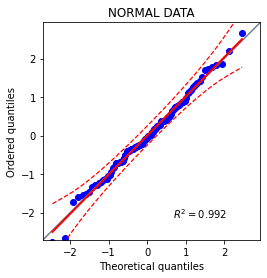

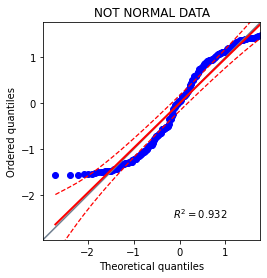

Text(0.5, 1.0, 'OUR DATA')

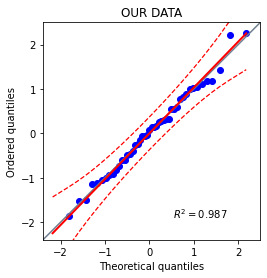

In [134]:
#QQ plot testing

#normally dist
plt.show()
data = np.random.normal(0, 1, 100)  
pg.qqplot(data).set_title('NORMAL DATA')

#not normally dist
plt.show()
data = np.random.uniform(0,7,200)
pg.qqplot(data).set_title('NOT NORMAL DATA')

#lets test our data
plt.show()            
pg.qqplot(df['lifeexpectancy']).set_title('OUR DATA')





In [135]:
#Hypothesis testing for normality
print(stats.normaltest(df['lifeexpectancy']))

NormaltestResult(statistic=0.4656081409753158, pvalue=0.7923087949934116)


High p value, >=0.05 so its normal dist

Take a small sample from population

In [136]:
df= df.sample(15)
df.head()

,person,lifeexpectancy,unemploymentdays,gender
35,36,81.917224,957.0,Female
25,26,66.424914,954.0,Female
32,33,77.505993,1024.0,Female
42,43,67.395675,1006.0,Female
2,3,80.990859,1007.0,Male


### **t-testing**

In [150]:
stats.ttest_1samp(df['lifeexpectancy'],80)

TtestResult(statistic=-3.6932506450407407, pvalue=0.002409304614410915, df=14)

**What is the degree of freedom?** 

In [138]:
len(df)

15

In [139]:
T,P = stats.ttest_1samp(df['lifeexpectancy'],80)
T,P

(-3.6932506450407407, 0.002409304614410915)

In [140]:
if P < 0.05:
  print("Reject Null Hypothesis i.e. actual mean is NOT 80 years ")
else:
  print("Accept Null Hypothesis i.e. actual mean is 80 years ")

Reject Null Hypothesis i.e. actual mean is NOT 80 years 


In [141]:
CI= stats.ttest_1samp(df['lifeexpectancy'],80).confidence_interval(confidence_level=0.95)
CI

ConfidenceInterval(low=60.25499309408903, high=74.76289208457763)